In [421]:
import pandas as pd
import numpy as np

In [422]:
dfranking = pd.read_csv("data/games/ranking.csv")
dfgamebox = pd.read_csv("data/games/games_details.csv")
dfgames = pd.read_csv("data/games/games.csv")

/tmp/ipykernel_15196/3784628109.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dfgamebox = pd.read_csv("data/games/games_details.csv")


In [423]:
dfranking = dfranking.drop(columns=["LEAGUE_ID","SEASON_ID","CONFERENCE","HOME_RECORD","ROAD_RECORD","G","W","L","RETURNTOPLAY"])
dfranking["STANDINGSDATE"] = pd.to_datetime(dfranking["STANDINGSDATE"])

In [424]:
dfranking.head()

,TEAM_ID,STANDINGSDATE,TEAM,W_PCT
0,1610612743,2022-12-22,Denver,0.633
1,1610612763,2022-12-22,Memphis,0.633
2,1610612740,2022-12-22,New Orleans,0.613
3,1610612756,2022-12-22,Phoenix,0.594
4,1610612746,2022-12-22,LA Clippers,0.576


In [425]:
dfgames = dfgames[dfgames["SEASON"] > 2019]
dfgames = dfgames.drop(columns=["PTS_home","FG_PCT_home","FT_PCT_home","FG3_PCT_home","AST_home","REB_home","PTS_away","FG_PCT_away","FT_PCT_away","FT_PCT_away","FG3_PCT_away","AST_away","REB_away", "GAME_STATUS_TEXT"])
dfgames["GAME_DATE_EST"] = pd.to_datetime(dfgames["GAME_DATE_EST"])

In [426]:
dfgames.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,TEAM_ID_away,HOME_TEAM_WINS
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,1610612759,1
1,2022-12-22,22200478,1610612762,1610612764,2022,1610612762,1610612764,1
2,2022-12-21,22200466,1610612739,1610612749,2022,1610612739,1610612749,1
3,2022-12-21,22200467,1610612755,1610612765,2022,1610612755,1610612765,1
4,2022-12-21,22200468,1610612737,1610612741,2022,1610612737,1610612741,0


In [427]:
dfranking = dfranking[dfranking["STANDINGSDATE"] >= dfgames["GAME_DATE_EST"].min()]

In [428]:
#Remove first 30 days of games in every season
for s in dfgames["SEASON"].unique():
    first = dfgames[dfgames["SEASON"] == s]["GAME_DATE_EST"].min()
    last = first + pd.Timedelta(days=30)
    print(first,last)
    mask = ~dfranking["STANDINGSDATE"].between(first,last)
    dfranking = dfranking[mask]
    mask2 = ~dfgames["GAME_DATE_EST"].between(first,last)
    dfgames = dfgames[mask2]


2022-09-30 00:00:00 2022-10-30 00:00:00
2021-10-03 00:00:00 2021-11-02 00:00:00
2020-12-11 00:00:00 2021-01-10 00:00:00


In [429]:
dfgames.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,TEAM_ID_away,HOME_TEAM_WINS
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,1610612759,1
1,2022-12-22,22200478,1610612762,1610612764,2022,1610612762,1610612764,1
2,2022-12-21,22200466,1610612739,1610612749,2022,1610612739,1610612749,1
3,2022-12-21,22200467,1610612755,1610612765,2022,1610612755,1610612765,1
4,2022-12-21,22200468,1610612737,1610612741,2022,1610612737,1610612741,0


In [430]:
dfgamebox = pd.read_csv("data/games/games_details.csv")

/tmp/ipykernel_15196/1454767176.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dfgamebox = pd.read_csv("data/games/games_details.csv")


In [431]:
#Remove some redundant columns
dfgamebox = dfgamebox.drop(["NICKNAME","COMMENT","FG_PCT","FG3_PCT","FT_PCT","REB","PTS","PLUS_MINUS"],axis=1)
dfgamebox.columns
#Subset the box scores to the games in dataframe
dfgamebox = dfgamebox[dfgamebox['GAME_ID'].isin(dfgames["GAME_ID"])]

In [432]:
dfgamebox.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,...,FG3A,FTM,FTA,OREB,DREB,AST,STL,BLK,TO,PF
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,F,18:06,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,5.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,F,31:01,7.0,14.0,...,4.0,7.0,10.0,6.0,3.0,6.0,1.0,0.0,2.0,1.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,C,21:42,6.0,9.0,...,0.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,2.0,4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,G,30:20,4.0,13.0,...,6.0,1.0,1.0,0.0,9.0,5.0,3.0,0.0,2.0,1.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,G,27:44,7.0,12.0,...,3.0,4.0,4.0,0.0,2.0,3.0,0.0,0.0,2.0,2.0


In [433]:
#Load player per game stats
dfplayerpergame = pd.read_csv("data/NBAstats/Player Per Game.csv")
dfplayerpergame.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp_per_game', 'fg_per_game',
       'fga_per_game', 'fg_percent', 'x3p_per_game', 'x3pa_per_game',
       'x3p_percent', 'x2p_per_game', 'x2pa_per_game', 'x2p_percent',
       'e_fg_percent', 'ft_per_game', 'fta_per_game', 'ft_percent',
       'orb_per_game', 'drb_per_game', 'trb_per_game', 'ast_per_game',
       'stl_per_game', 'blk_per_game', 'tov_per_game', 'pf_per_game',
       'pts_per_game'],
      dtype='object')

In [434]:
#Remove some columns
dfplayerpergame = dfplayerpergame.drop(["lg","tm","g","gs","seas_id","player_id","fg_percent","x3p_percent","x2p_per_game","x2pa_per_game","x2p_percent","e_fg_percent","ft_percent","trb_per_game","pts_per_game","birth_year"],axis=1)
dfplayerpergame = dfplayerpergame.rename(columns={"season":"SEASON", "player":"PLAYER_NAME", "pos":"POS", "age":"AGE", 
                                "experience":"EXP", "mp_per_game":"MIN", "fg_per_game":"FGM", "fga_per_game":"FGA",
                                "x3p_per_game":"FG3M", "x3pa_per_game":"FG3A", "ft_per_game":"FTM", "fta_per_game":"FTA",
                                "orb_per_game":"OREB", "drb_per_game":"DREB", "ast_per_game":"AST", "stl_per_game":"STL",
                                "blk_per_game":"BLK", "tov_per_game":"TO", "pf_per_game": "PF"})
dfplayerpergame["PLAYER_NAME"] = dfplayerpergame["PLAYER_NAME"].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8')

In [435]:
#Manual clean because of name-changes and differences in punctuation

dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Kevin Knox","PLAYER_NAME"] = "Kevin Knox II"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Robert Williams","PLAYER_NAME"] = "Robert Williams III"
dfgamebox.loc[dfgamebox["PLAYER_NAME"] == "OG Anunoby","PLAYER_NAME"] = "O.G. Anunoby"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "OG Anunoby","PLAYER_NAME"] = "O.G. Anunoby"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Marcus Morris","PLAYER_NAME"] = "Marcus Morris Sr."
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Xavier Tillman Sr.","PLAYER_NAME"] = "Xavier Tillman"
dfgamebox.loc[dfgamebox["PLAYER_NAME"] == "Jeff Dowtin","PLAYER_NAME"] = "Jeff Dowtin Jr."
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Jeff Dowtin","PLAYER_NAME"] = "Jeff Dowtin Jr."
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Melvin Frazier","PLAYER_NAME"] = "Melvin Frazier Jr."
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Derrick Walton","PLAYER_NAME"] = "Derrick Walton Jr."
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "C.J. Miles","PLAYER_NAME"] = "CJ Miles"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "B.J. Johnson","PLAYER_NAME"] = "BJ Johnson"
dfgamebox.loc[dfgamebox["PLAYER_NAME"] == "PJ Dozier","PLAYER_NAME"] = "P.J. Dozier"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "PJ Dozier","PLAYER_NAME"] = "P.J. Dozier"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Enes Kanter","PLAYER_NAME"] = "Enes Freedom"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Harry Giles","PLAYER_NAME"] = "Harry Giles III"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Nicolas Claxton","PLAYER_NAME"] = "Nic Claxton"
dfgamebox.loc[dfgamebox["PLAYER_NAME"] == "Nicolas Claxton","PLAYER_NAME"] = "Nic Claxton"
dfgamebox.loc[dfgamebox["PLAYER_NAME"] == "Enes Kanter","PLAYER_NAME"] = "Enes Freedom"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "J.J. Redick","PLAYER_NAME"] = "JJ Redick"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Brian Bowen","PLAYER_NAME"] = "Brian Bowen II"
dfplayerpergame.loc[dfplayerpergame["PLAYER_NAME"] == "Frank Mason III","PLAYER_NAME"] = "Frank Mason"



In [436]:
#These players all did not play, or played very few games in the NBA. It is not a problem that we do not have seasonal stats for them
playersbox = dfgamebox["PLAYER_NAME"].unique()
playerspergame = dfplayerpergame["PLAYER_NAME"].unique()
mask = np.isin(playersbox, playerspergame, invert=True)
playersbox[mask]

array(['AJ Green', 'Ibou Badji', 'John Butler Jr.', 'Luca Vildoza',
       'DJ Stewart', 'MJ Walker', 'Aric Holman', 'Justin Tillman',
       'Trevon Scott', 'Malik Ellison'], dtype=object)

In [437]:
#Cut off the seasons we dont care about
dfplayerpergame = dfplayerpergame[(dfplayerpergame["SEASON"] > 2018) & (dfplayerpergame["SEASON"] < 2022)]
dfplayerpergame["SEASON"].unique()

array([2021, 2020, 2019])

In [438]:
#Because of the cutoff, now this mask will give us all players who had a rookie season in 2022, or their final season in 2019
playerspergame = dfplayerpergame["PLAYER_NAME"].unique()
mask = np.isin(playersbox, playerspergame, invert=True)
len(playersbox[mask])

203

In [439]:
for s in dfplayerpergame["SEASON"].unique():
    print(s)
    playerspergame = dfplayerpergame[dfplayerpergame["SEASON"] == s]["PLAYER_NAME"].unique()
    games = dfgames[dfgames["SEASON"] == s+1]["GAME_ID"]
    mask1 = np.isin(dfgamebox["GAME_ID"], games)
    playersbox = dfgamebox[mask1]["PLAYER_NAME"].unique()
    print(len(playersbox))
    mask = np.isin(playersbox, playerspergame, invert=True)
    players_notaccounted = playersbox[mask]
    print(len(players_notaccounted))
    ages = [22]*len(players_notaccounted)
    season = [s]*len(players_notaccounted)
    zeros = [0]*len(players_notaccounted)
    data = {"SEASON":season , "PLAYER_NAME":players_notaccounted , "POS":zeros , "AGE":ages , "EXP":zeros , "MIN":zeros ,
                            "FGM":zeros , "FGA":zeros , "FG3M":zeros , "FG3A":zeros , "FTM":zeros , "FTA":zeros , "OREB":zeros ,
                            "DREB":zeros , "AST":zeros , "STL":zeros , "BLK":zeros , "TO":zeros , "PF":zeros}
    data = pd.DataFrame(data=data)
    dfplayerpergame = pd.concat([dfplayerpergame,data], ignore_index = True)
            
    #players_missing = dfgamebox[~dfgamebox["PLAYER_NAME"].isin(dfplayerpergame[dfplayerpergame["SEASON"] == s]["PLAYER_NAME"])]["PLAYER_NAME"].unique()
    #for p in players:
    #    dfplayerpergame[(dfplayerpergame["SEASON"] == s) &]

2021
485
145
2020
619
228
2019
540
198


In [440]:
dfplayerpergame[dfplayerpergame["PLAYER_NAME"] == "Jeremy Sochan"]

,SEASON,PLAYER_NAME,POS,AGE,EXP,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,STL,BLK,TO,PF
2064,2021,Jeremy Sochan,0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [441]:
#Because of the cutoff, now this mask will give us all players who had a rookie season in 2022, or their final season in 2019
playerspergame = dfplayerpergame["PLAYER_NAME"].unique()
mask = np.isin(playersbox, playerspergame, invert=True)
len(playersbox[mask])

0

In [442]:
#All rookies added as zero-entries
dfplayerpergame[dfplayerpergame["POS"] == 0]

,SEASON,PLAYER_NAME,POS,AGE,EXP,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,STL,BLK,TO,PF
2064,2021,Jeremy Sochan,0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,2021,Zach Collins,0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2066,2021,Malaki Branham,0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2067,2021,Charles Bassey,0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2068,2021,Trey Murphy III,0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,2019,Ashton Hagans,0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2631,2019,Marques Bolden,0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2632,2019,Dakota Mathias,0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2633,2019,Chris Clemons,0,22.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [443]:
dfplayerpergame = dfplayerpergame.groupby(["SEASON","PLAYER_NAME","POS"]).mean()

In [444]:
dfplayerpergame.loc[2020]

,,AGE,EXP,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,STL,BLK,TO,PF
PLAYER_NAME,POS,,,,,,,,,,,,,,,,
Aaron Gordon,PF,24.0,6.0,32.5,5.4,12.4,1.2,3.8,2.4,3.6,1.7,5.9,3.7,0.8,0.6,1.6,2.0
Aaron Henry,0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Holiday,PG,23.0,2.0,24.5,3.5,8.5,1.3,3.3,1.1,1.3,0.3,2.0,3.4,0.8,0.2,1.3,1.8
Aaron Nesmith,0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Wiggins,0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeke Nnaji,0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zhaire Smith,SF,20.0,2.0,4.6,0.4,1.6,0.0,0.4,0.3,0.6,0.0,0.3,0.3,0.4,0.0,0.3,0.6
Ziaire Williams,0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [445]:
dfgames.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,TEAM_ID_away,HOME_TEAM_WINS
0,2022-12-22,22200477,1610612740,1610612759,2022,1610612740,1610612759,1
1,2022-12-22,22200478,1610612762,1610612764,2022,1610612762,1610612764,1
2,2022-12-21,22200466,1610612739,1610612749,2022,1610612739,1610612749,1
3,2022-12-21,22200467,1610612755,1610612765,2022,1610612755,1610612765,1
4,2022-12-21,22200468,1610612737,1610612741,2022,1610612737,1610612741,0


In [446]:
dfgames["HOME_TEAM_WIN_PCT"] = 0
dfgames["AWAY_TEAM_WIN_PCT"] = 0
dfgames["HOME_TEAM_K"] = 0
dfgames["AWAY_TEAM_K"] = 0

In [447]:
dfgamebox["MIN"] = dfgamebox["MIN"].str.slice(0,6).str.replace(':', '.').astype(float)
dfgamebox = dfgamebox.fillna(0)

In [448]:
for index, row in dfgames.iterrows():
    #print(row["GAME_ID"])
    dfgames.at[index,"HOME_TEAM_WIN_PCT"] = dfranking[(dfranking["TEAM_ID"] == row["HOME_TEAM_ID"]) & (dfranking["STANDINGSDATE"] == row["GAME_DATE_EST"])]["W_PCT"].iloc[0]
    dfgames.at[index,"AWAY_TEAM_WIN_PCT"] = dfranking[(dfranking["TEAM_ID"] == row["VISITOR_TEAM_ID"]) & (dfranking["STANDINGSDATE"] == row["GAME_DATE_EST"])]["W_PCT"].iloc[0]
    box = dfgamebox[dfgamebox["GAME_ID"] == row["GAME_ID"]]
    home = box[box["TEAM_ID"] == row["HOME_TEAM_ID"]]
    away = box[box["TEAM_ID"] == row["VISITOR_TEAM_ID"]]

    mins_home = []
    for p in home["PLAYER_NAME"]:
        mins_home.append(dfplayerpergame.loc[row["SEASON"]-1,p]["MIN"][0])
    k_score = sum(mins_home - home["MIN"])
    dfgames.at[index,"HOME_TEAM_K"] = k_score

    mins_away = []
    for p in away["PLAYER_NAME"]:
        mins_away.append(dfplayerpergame.loc[row["SEASON"]-1,p]["MIN"][0])
    k_score = sum(mins_away - away["MIN"])
    dfgames.at[index,"AWAY_TEAM_K"] = k_score


<Axes: ylabel='Frequency'>

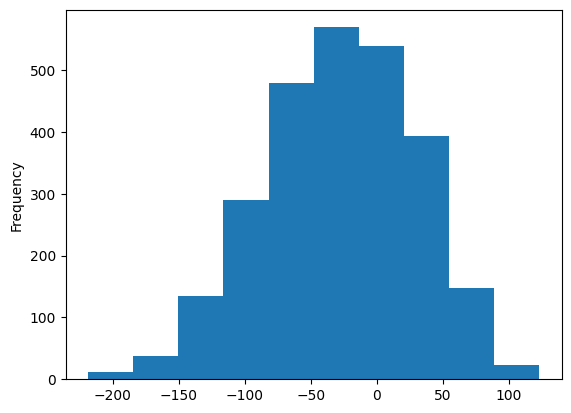

In [449]:
dfgames["HOME_TEAM_K"].plot.hist()

<Axes: ylabel='Frequency'>

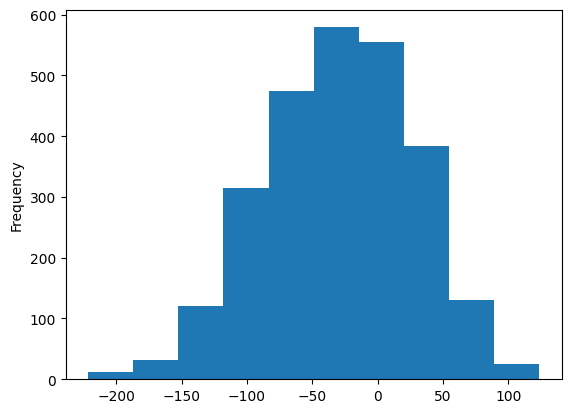

In [450]:
dfgames["AWAY_TEAM_K"].plot.hist()

In [451]:
dfgames.to_csv("dfgames.csv")
dfranking.to_csv("dfranking.csv")
dfgamebox.to_csv("dfgamebox.csv")
dfplayerpergame.to_csv("dfplayerpergame.csv")